# Задание 2

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, roc_curve,f1_score, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

## Визуализация

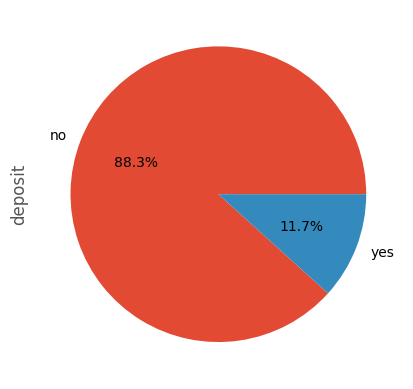

In [ ]:
import matplotlib.pyplot as plt

df['deposit'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df_visual = df.copy()

In [ ]:
df_visual['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

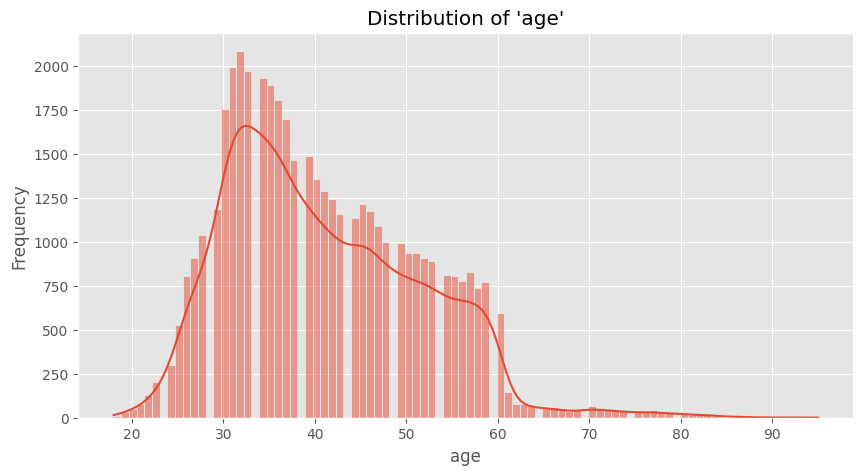

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['age'], kde=True)
plt.title("Distribution of 'age'")
plt.xlabel("age")
plt.ylabel("Frequency")
plt.show()

#### Матрица корреляции

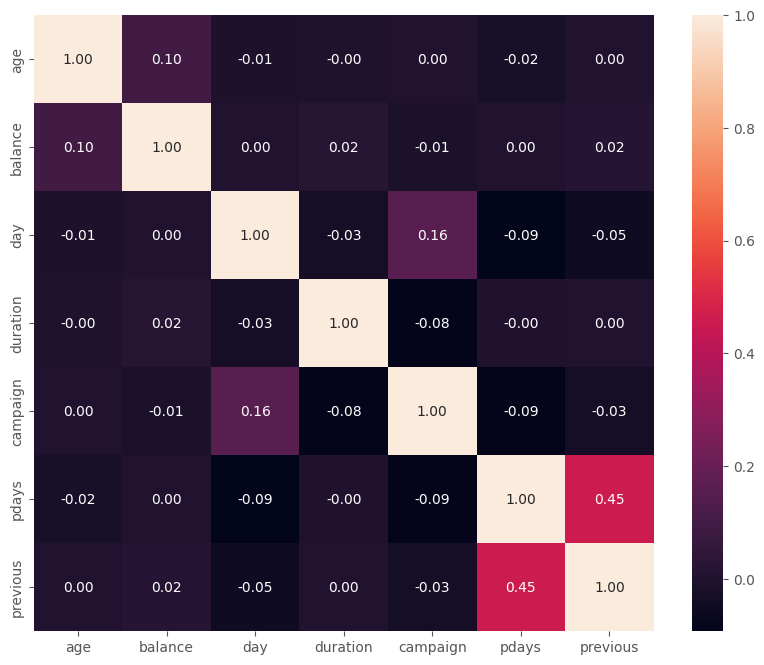

In [ ]:
# Создание графика и задание его размеров
fig = plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), annot = True, fmt=".2f") # annot добавляет значение корреляции

# Отображение графика
plt.show()

#### Диаграмма рассеяния

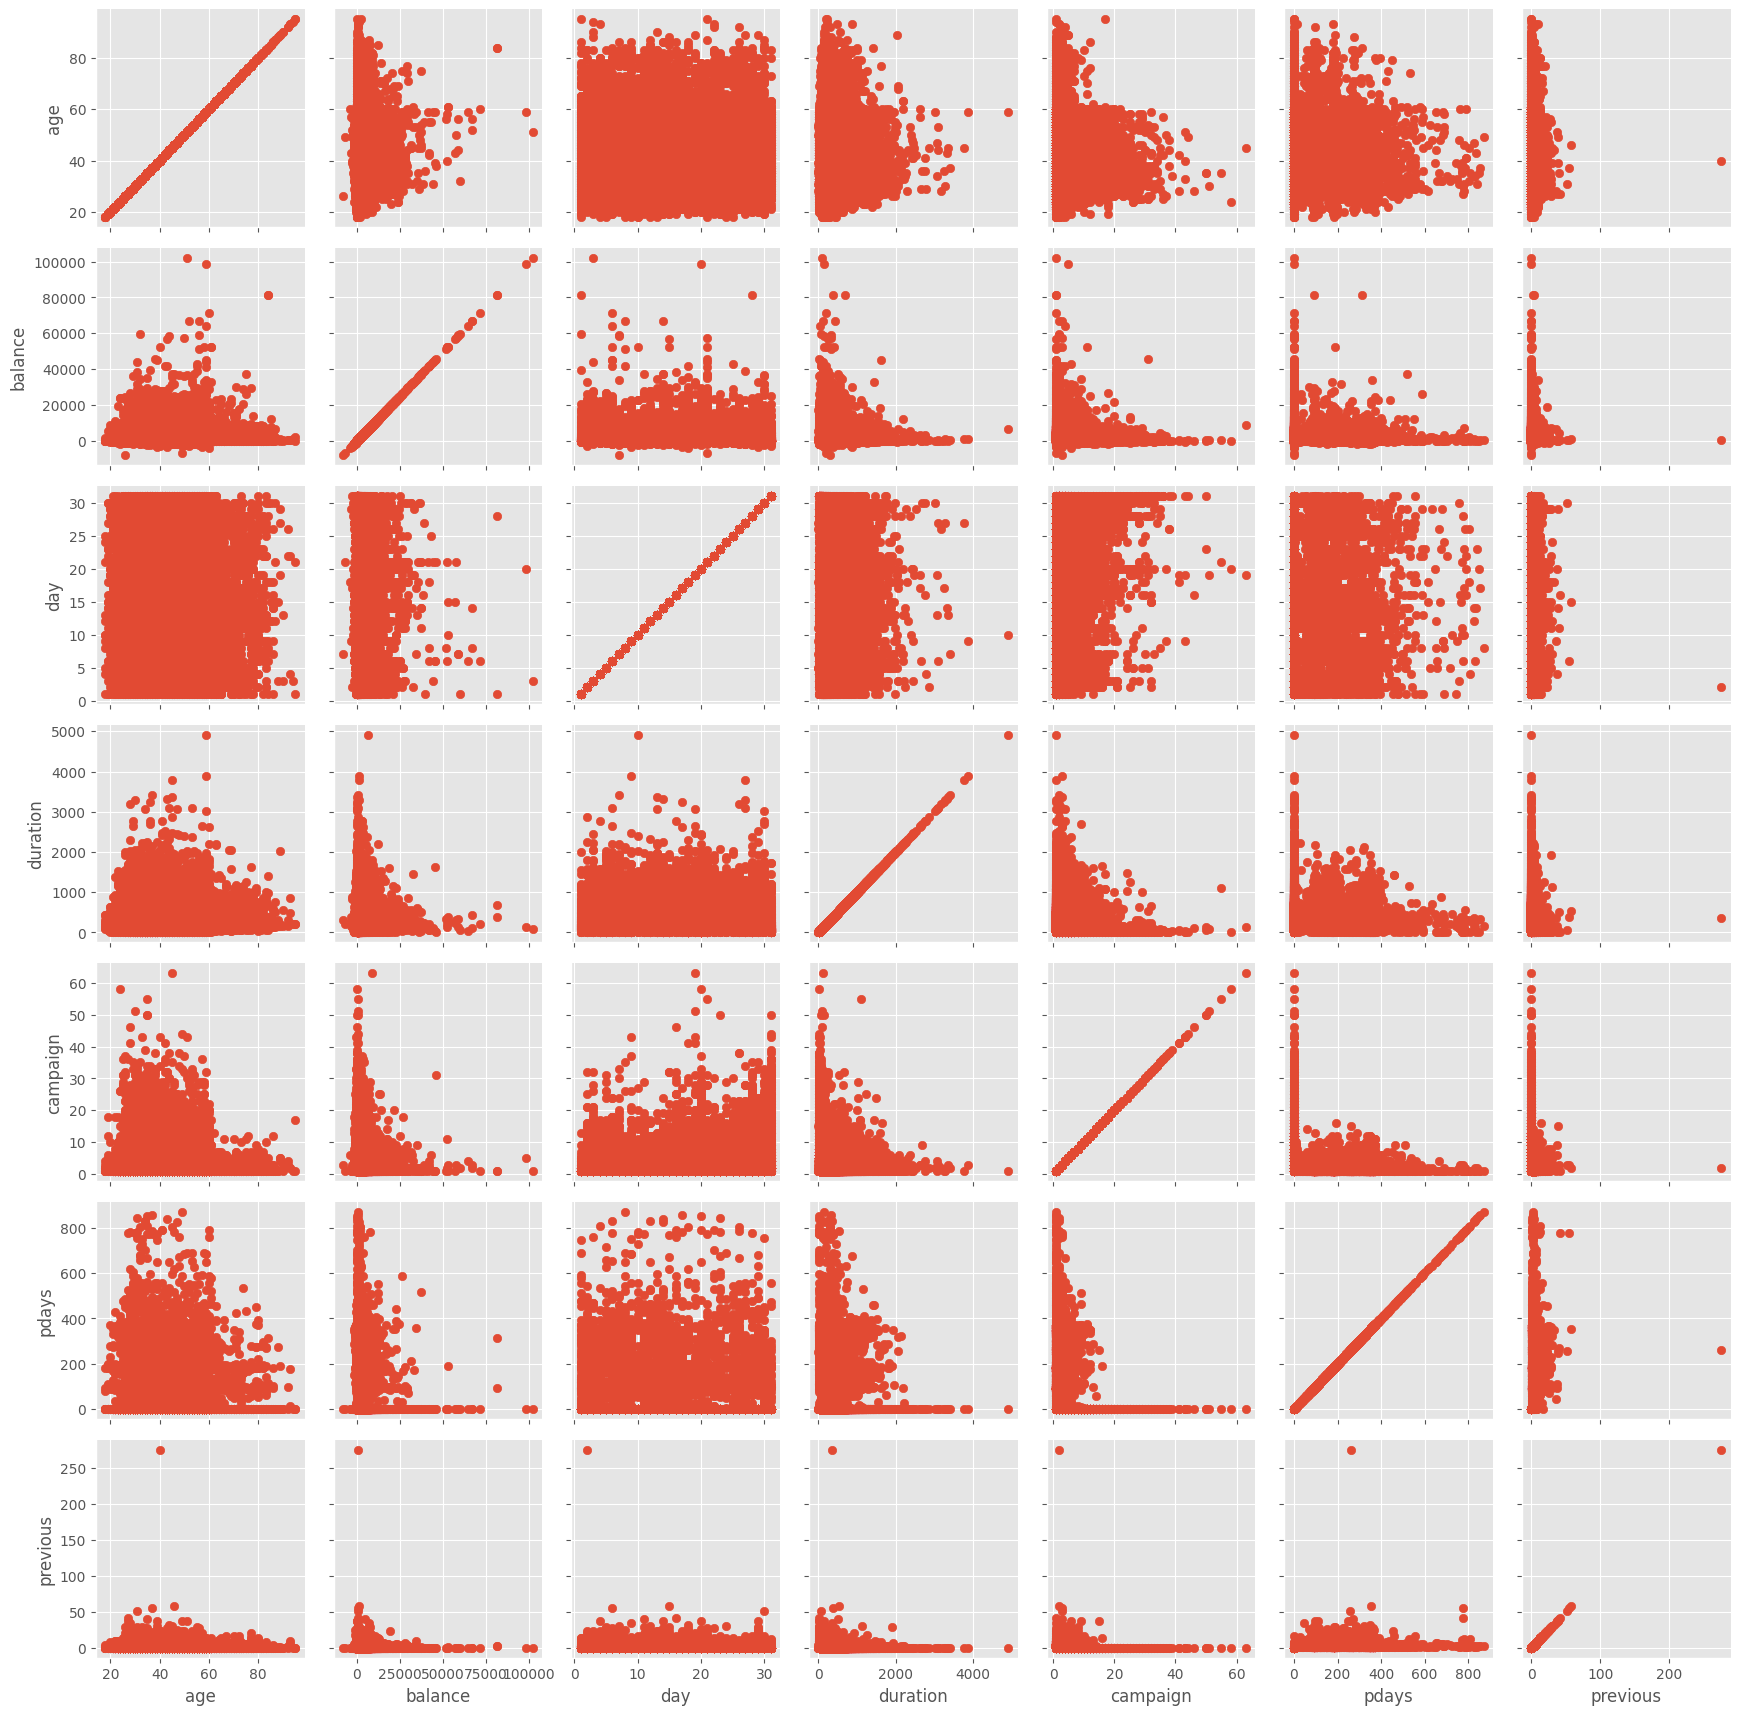

In [ ]:
graph = sns.PairGrid(df) # строим сетку по 2 признакам для каждого столбца таблицы
graph.map(plt.scatter) # строим графики из точек для всех элементов списка
plt.show()

## Предварительный анализ и обработка данных

### Проверка пропущенных значений

In [ ]:
missing_values = df.isnull().sum()
pd.DataFrame(missing_values, columns=['Missing values, %']) / len(df) * 100

,"Missing values, %"
age,0.0
job,0.0
marital,0.0
education,0.0
default,0.0
balance,0.0
housing,0.0
loan,0.0
contact,0.0
day,0.0


In [ ]:
target = 'deposit'
X = df.drop(columns=[target])
y = df[target]

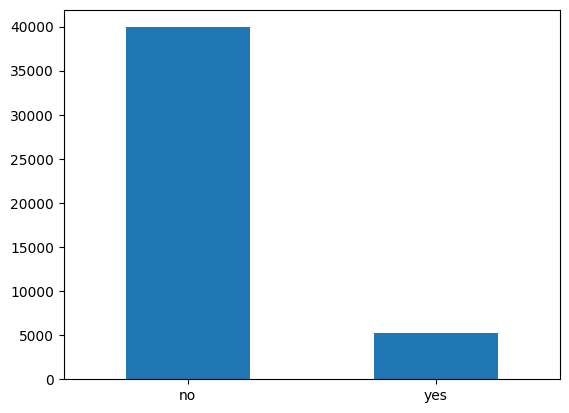

In [ ]:
targets_counts = pd.value_counts(y)
targets_counts.plot.bar(rot=0)
plt.show()

In [ ]:
n_classes = len(targets_counts)
n_classes

2

In [ ]:
from sklearn import preprocessing

In [ ]:
encoder = preprocessing.LabelEncoder().fit(y)
y = encoder.transform(y)

In [ ]:
X = pd.get_dummies(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
y_train=np.vstack(y_train).astype(np.float64)
y_test=np.vstack(y_test).astype(np.float64)


X_train, y_train, X_test, y_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

In [ ]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 20

train_dl = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size)

test_dl = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [ ]:
model = nn.Sequential(
    nn.Linear(51,10),
    nn.LeakyReLU(),
    nn.Linear(10,1),
    nn.Sigmoid()
)


In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.RMSprop(model.parameters())
train_losses = []
test_losses = []

# Обучение модели
for epoch in range(40):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_dl):
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(outputs)
        loss = criterion(outputs.squeeze(), labels.squeeze())
        train_losses.append(loss.item())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(train_dl)))

Epoch 1 loss: 0.484
Epoch 2 loss: 0.316
Epoch 3 loss: 0.333
Epoch 4 loss: 0.319
Epoch 5 loss: 0.312
Epoch 6 loss: 0.318
Epoch 7 loss: 0.341
Epoch 8 loss: 0.307
Epoch 9 loss: 0.320
Epoch 10 loss: 0.356
Epoch 11 loss: 0.291
Epoch 12 loss: 0.300
Epoch 13 loss: 0.313
Epoch 14 loss: 0.321
Epoch 15 loss: 0.289
Epoch 16 loss: 0.344
Epoch 17 loss: 0.416
Epoch 18 loss: 0.281
Epoch 19 loss: 0.313
Epoch 20 loss: 0.284
Epoch 21 loss: 0.303
Epoch 22 loss: 0.307
Epoch 23 loss: 0.335
Epoch 24 loss: 0.295
Epoch 25 loss: 0.288
Epoch 26 loss: 0.309
Epoch 27 loss: 0.290
Epoch 28 loss: 0.289
Epoch 29 loss: 0.277
Epoch 30 loss: 0.276
Epoch 31 loss: 0.271
Epoch 32 loss: 0.295
Epoch 33 loss: 0.280
Epoch 34 loss: 0.266
Epoch 35 loss: 0.270
Epoch 36 loss: 0.279
Epoch 37 loss: 0.274
Epoch 38 loss: 0.270
Epoch 39 loss: 0.318
Epoch 40 loss: 0.281


In [ ]:
y_true, y_pred = [], []
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_dl:
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

print('Accuracy: %.3f' % (correct / total))

f1_score(y_test,y_pred)
recall = recall_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('ROC-AUC: %.3f' % roc_auc)
print('f1-score: %.3f' % roc_auc)
confusion_matrix(y_true, y_pred)

Accuracy: 0.896
Recall: 0.238
Precision: 0.703
ROC-AUC: 0.612
f1-score: 0.612


array([[7842,  110],
       [ 831,  260]])

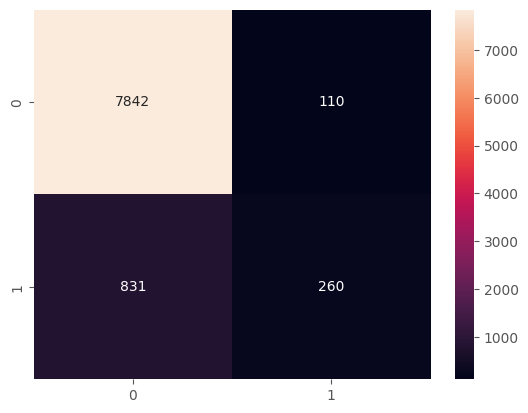

In [ ]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="3d");

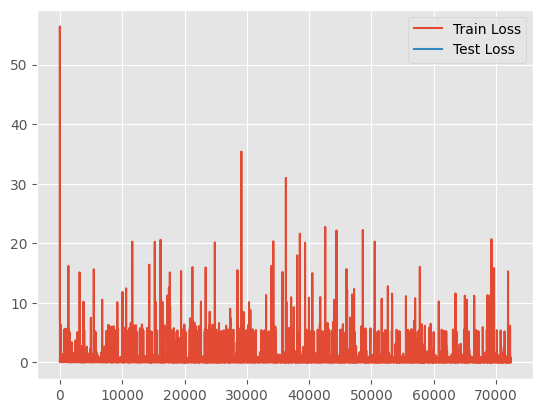

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

# Задание 3

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('ggplot')

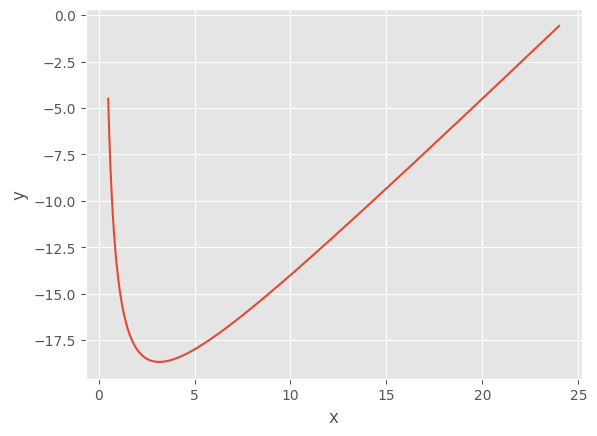

In [ ]:
f = lambda x: ((x**2-25*x+10)/x)
start, end = 0.5, 24
x = torch.arange(start, end + 1e-3, 1e-3)
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
tol = 0.1 # погрешность
optim_step = 0.1 # величина шага

переменная начальной точки optim_x и градиент для обратного распространения (requires_grad=True)

In [ ]:
optim_x = torch.tensor(3.0, requires_grad=True)

In [ ]:
optim_history = [optim_x.item()]

In [ ]:
while True:
    f(optim_x).backward()
    with torch.no_grad():
        optim_x -= optim_step * optim_x.grad
        optim_x.clamp_(start, end)
        print(optim_x)
    optim_history.append(optim_x.item())
    if torch.isnan(f(optim_x)) or torch.isinf(f(optim_x)):
        break
    grad_norm = torch.linalg.norm(optim_x.grad)
    optim_x.grad.zero_()
    if grad_norm <= tol or optim_x - optim_history[-2] == 0:
        break

tensor(3.0111, requires_grad=True)
tensor(3.0214, requires_grad=True)
tensor(3.0309, requires_grad=True)


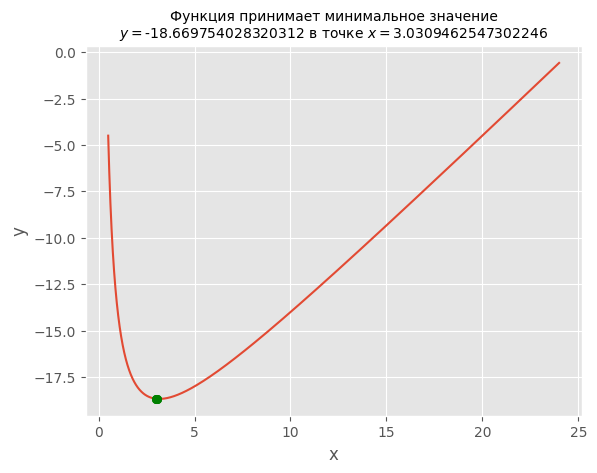

In [ ]:
optim_history = torch.tensor(optim_history)
title = ('Функция принимает минимальное значение\n'
         '${y = }$' + f'{f(optim_history[-1])} '
         'в точке ${x = }$' f'{optim_history[-1]}')
plt.title(title, size=10)
plt.plot(x, f(x))
plt.scatter(optim_history, f(optim_history), color='g', zorder=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()